# Analysis of Complex Networks 
## Assignment 2 (Group 6)
### Student: André Dussing  ID: 018113442F 

Github: https://github.com/andreunilux/Complex-Networks

In [49]:
# import necessary libraries
import networkx as nx
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

At first we set the path according to our dataset we are using (here Group6)


1. Facebook-Ego 
2. Twitter-Ego

In [2]:
path = "exercise_complex_network/Datasets/Group6"
path_facebook = os.path.join(path,"Facebook-Ego", "1684.edges" ) # 1. Facebook-Ego
path_twitter =  os.path.join(path,"Twitter-Ego", "2029971.edges" ) # 2. Twitter-Ego
# Now we read the edge list from the file and create the graph with NetworkX


facebook_graph = nx.read_edgelist(path_facebook, nodetype=int) # Undirected
twitter_graph = nx.read_edgelist(path_twitter, nodetype=int, create_using=nx.DiGraph()) #Directed




### (a) What is the degree distribution of the network? Please plot the distribution and attach it to your answer sheet.

1. Facebook (Undirected)

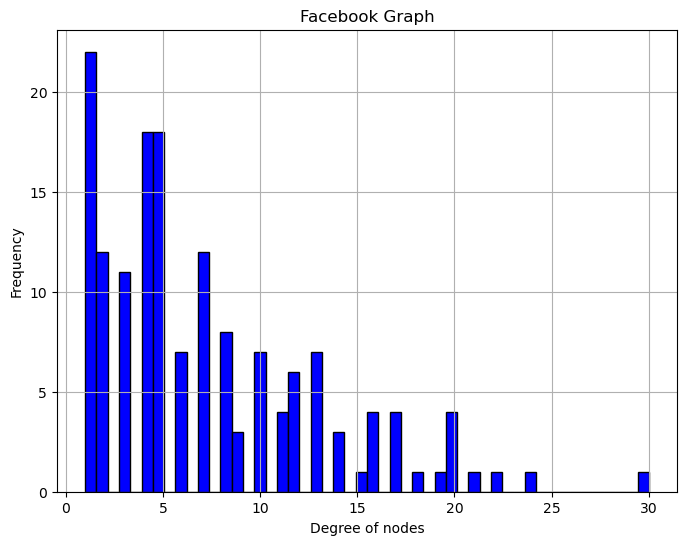

,node_id,degree
count,157.000000,157.000000
mean,2588.363057,7.248408
std,484.394191,5.753100
min,58.000000,1.000000
25%,2685.000000,3.000000
50%,2725.000000,5.000000
75%,2765.000000,10.000000
max,2808.000000,30.000000


In [31]:
def degree_distribution_facebook(graph=facebook_graph, title="Facebook Graph"):
    degrees = [degree_of_node for node, degree_of_node in graph.degree()]
    both = [(n,d) for n, d in graph.degree()] # tuples (node, degree)
    plt.figure(figsize=(8, 6))
    plt.hist(degrees, bins=50, color='blue', edgecolor='black')
    plt.title(title)
    plt.xlabel("Degree of nodes")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()
    df_both = pd.DataFrame(both, columns=["node_id", "degree"])
    return df_both

df_facebook_nodes =degree_distribution_facebook()
df_facebook_nodes.describe()

2. Twitter (Directed)

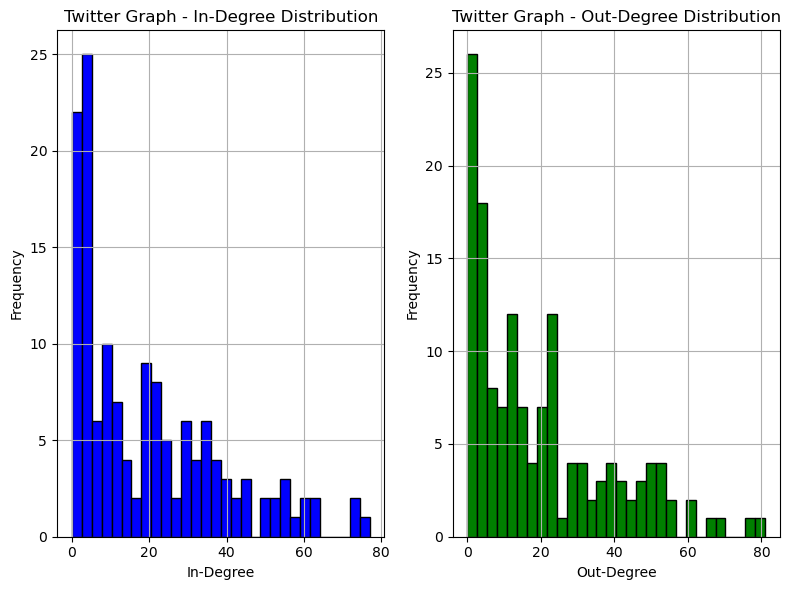

incoming


,node_id,degree
count,1.430000e+02,143.000000
mean,2.915733e+07,19.790210
std,2.905869e+07,18.733059
min,1.029700e+04,0.000000
25%,1.470811e+07,4.000000
50%,1.839377e+07,15.000000
75%,3.047239e+07,31.000000
max,1.621451e+08,77.000000


In [26]:
def degree_distribution_twitter(graph=twitter_graph, title="Twitter Graph"):
    degrees_in = [degree_of_node for node, degree_of_node in graph.in_degree()]
    both_in = [(n,d) for n, d in graph.in_degree()] # tuples (node, degree)
    degrees_out = [degree_of_node for node, degree_of_node in graph.out_degree()]
    both_out = [(n,d) for n, d in graph.out_degree()] # tuples (node, degree)
    df_both_in = pd.DataFrame(both_in, columns=["node_id", "degree"])
    df_both_out = pd.DataFrame(both_out, columns=["node_id", "degree"])
    
    plt.figure(figsize=(8, 6))
    # In-degree histogram
    plt.subplot(1, 2, 1)
    plt.hist(degrees_in, bins=30, color='blue', edgecolor='black')
    plt.title(f"{title} - In-Degree Distribution")
    plt.xlabel("In-Degree")
    plt.ylabel("Frequency")
    plt.grid(True)

    # Out-degree histogram
    plt.subplot(1, 2, 2)
    plt.hist(degrees_out, bins=30, color='green', edgecolor='black')
    plt.title(f"{title} - Out-Degree Distribution")
    plt.xlabel("Out-Degree")
    plt.ylabel("Frequency")
    plt.grid(True)

    # Show the plots
    plt.tight_layout()
    plt.show()

    return df_both_in,df_both_out

df_twitter_in ,df_twitter_out =degree_distribution_twitter()
print("incoming")
df_twitter_in.describe()


### (b) According to the degree distribution, what is the main difference between the chosen network and a random network with the same number of nodes? What may cause the difference?

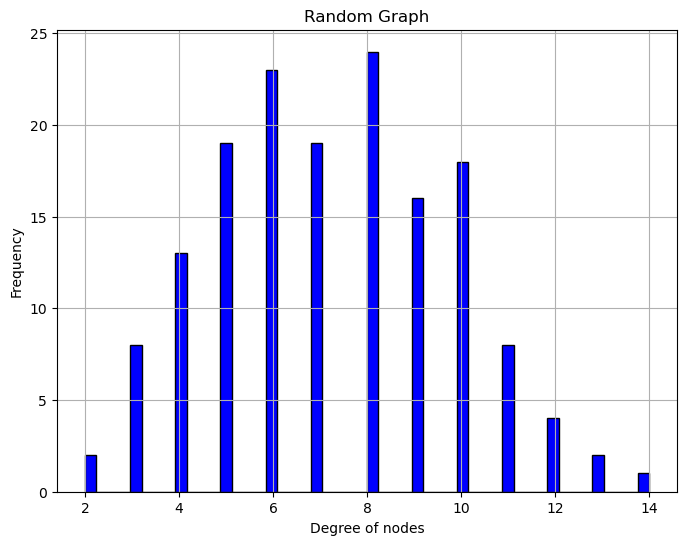

,node_id,degree
0,0,5
1,1,12
2,2,9
3,3,10
4,4,5
...,...,...
152,152,8
153,153,3
154,154,6
155,155,6


In [32]:
# I will focus on an undireced graph as the random graph and compare it to the facebook graph
facebook_nodes = facebook_graph.number_of_nodes()
facebook_edges = facebook_graph.number_of_edges()
random_graph = nx.gnm_random_graph(facebook_nodes,facebook_edges)

degree_distribution_facebook(random_graph,"Random Graph")

The random graph resembles more a normal distribution, while the chosen network (Facebook) tends to follow a power-law distribution, 
where a few nodes (hubs) have many connections, and most nodes have few connections. This could be explained by the fact that users mainly use Facebook to stay in contact with one or a few friends. a random network with the same number of nodes and edges tends to have a binomial degree distribution, 
where most nodes have similar numbers of connections. The difference is due to real-world networks' structure, 
often influenced by preferential attachment.

### (c) What is the average path length of the network?

In [43]:
def compute_average_path_length(graph, title):
    if nx.is_connected(graph):
        avg_path_length = nx.average_shortest_path_length(graph)
        print(f"The average path length of {title}: {avg_path_length}")
    else:
        # For disconnected graphs, use the largest connected component
        largest_cc = max(nx.connected_components(graph), key=len)
        subgraph = graph.subgraph(largest_cc)
        avg_path_length = nx.average_shortest_path_length(subgraph)
        print(f"The average path length of {title} (Largest Component): {avg_path_length}")
        

1. Facebook (Undirected)

In [44]:
compute_average_path_length(facebook_graph,"Facebook-Ego")

The average path length of Facebook-Ego (Largest Component): 4.097008666480291


2. Twitter (Directed)

In [46]:
def average_path_length_directed(graph):
    total_distance = 0
    count_paths = 0

    # Iterate over all pairs of nodes in the directed graph
    for source in graph.nodes():
        for target in graph.nodes():
            if source != target:
                try:
                    # Compute shortest path length
                    distance = nx.shortest_path_length(graph, source=source, target=target)
                    total_distance += distance
                    count_paths += 1
                except nx.NetworkXNoPath:
                    # Skip if there is no path between source and target
                    pass

    # Calculate the average path length
    if count_paths > 0:
        average_length = total_distance / count_paths
    else:
        average_length = float('inf')  
    print(f"Average path length in the directed graph: {average_length}")
    return average_length

In [48]:
average_path_length_directed(twitter_graph)

Average path length in the directed graph: 2.3963952282157677


2.3963952282157677

### (d) Please randomly choose 5 nodes from the network, and calculate the clustering coefficients of these nodes, respectively.

In [50]:
def compute_random_clustering_coefficients(graph, num_nodes=5):
    random_nodes = random.sample(list(graph.nodes()), num_nodes)
    clustering_coeffs = {node: nx.clustering(graph, node) for node in random_nodes}
    print(f"Clustering coefficients for 5 random nodes: {clustering_coeffs}")
    return clustering_coeffs

In [51]:
facebook_clustering_coeffs = compute_random_clustering_coefficients(facebook_graph)
twitter_clustering_coeffs = compute_random_clustering_coefficients(twitter_graph.to_undirected())

Clustering coefficients for 5 random nodes: {2668: 0.2, 2697: 0, 1171: 0.4666666666666667, 2775: 0.5, 1726: 0.47619047619047616}
Clustering coefficients for 5 random nodes: {18785238: 0.5048643113159242, 11440442: 0.46153846153846156, 22269570: 0.6096256684491979, 14099695: 1.0, 17366486: 0.5289304500292227}


### (e) What is the average clustering coefficient?

In [52]:
def compute_average_clustering_coefficient(graph, title):
    avg_clustering = nx.average_clustering(graph)
    print(f"The average clustering coefficient of {title}: {avg_clustering}")

In [53]:
compute_average_clustering_coefficient(facebook_graph, "Facebook-Ego Network")
compute_average_clustering_coefficient(twitter_graph.to_undirected(), "Twitter-Ego Network")

The average clustering coefficient of Facebook-Ego Network: 0.39469415134853486
The average clustering coefficient of Twitter-Ego Network: 0.5558321649127087


### (f) Please list the nodes which compose the largest component in the network

In [54]:
def find_largest_component(graph, title):
    largest_cc = max(nx.connected_components(graph), key=len)
    print(f"The largest component in {title} consists of {len(largest_cc)} nodes.")
    print(f"Nodes in the largest component: {largest_cc}")


In [55]:
find_largest_component(facebook_graph, "Facebook-Ego Network")
find_largest_component(twitter_graph.to_undirected(), "Twitter-Ego Network")

The largest component in Facebook-Ego Network consists of 147 nodes.
Nodes in the largest component: {58, 2661, 2662, 2663, 2664, 2665, 2666, 2667, 2668, 2669, 107, 1642, 2672, 2673, 2674, 2675, 2676, 2677, 2678, 2679, 2680, 1656, 2681, 2682, 2684, 2683, 2686, 2687, 2685, 2689, 2690, 1666, 2688, 2692, 2694, 2695, 2696, 2697, 2698, 2693, 2700, 2701, 2702, 2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2723, 2724, 2725, 2726, 2727, 2728, 2729, 2730, 2731, 171, 2733, 2734, 2735, 2737, 2738, 2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 1726, 2757, 2758, 2759, 2760, 2756, 2762, 2763, 2761, 2765, 2764, 2766, 2768, 2769, 2770, 2772, 2773, 2775, 2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787, 1758, 2789, 2790, 2791, 2793, 2794, 2795, 2796, 2797, 2798, 2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807, 2808, 1171, 1405, 1419, 1450, 990, 1505, 1534}
The largest component